In [96]:
import pandas as pd

# 파일 경로
file_path_weather = './data/대구 발전량 예측 관련 데이터/대구기후_OBS_ASOS_TIM_2022_수정.csv'
file_path_satin = './data/대구 발전량 예측 관련 데이터/공단_충전소_일사량_데이터_수정.xlsx'

# 데이터 불러오기
df_weather = pd.read_csv(file_path_weather)
df_satin = pd.read_excel(file_path_satin)

# 결측값 확인
print(df_weather.isnull().sum())
print(df_satin.isnull().sum())

# 이상치 확인
df_weather[(df_weather['T'] < -30) | (df_weather['T'] > 50)]
df_satin[(df_satin['GHI'] < 0)]

# 문제없음

YEAR     0
MONTH    0
DAY      0
HOUR     0
T        0
PR       0
H        0
SF       0
CC       0
SD       0
dtype: int64
name     0
YEAR     0
MONTH    0
DAY      0
HOUR     0
GHI      0
CGHI     0
dtype: int64


,name,YEAR,MONTH,DAY,HOUR,GHI,CGHI


In [97]:
import pandas as pd

# 예시: df_weather와 df_satin이 이미 존재한다고 가정

# YEAR, MONTH, HOUR 열을 기준으로 병합
df_weather_statin_mergin = pd.merge(df_weather, df_satin, on=['YEAR', 'MONTH', 'DAY', 'HOUR'], how='inner')

# 결과 확인
df_weather_statin_mergin.head()

,YEAR,MONTH,DAY,HOUR,T,PR,H,SF,CC,SD,name,GHI,CGHI
0,2022,1,2,8,-5.4,0.0,58.0,0.0,0,0.2,시청별관,0.0,0.0
1,2022,1,2,8,-5.4,0.0,58.0,0.0,0,0.2,농수산물도매시장,0.0,0.0
2,2022,1,2,8,-5.4,0.0,58.0,0.0,0,0.2,농수산물도매시장2,0.0,0.0
3,2022,1,2,8,-5.4,0.0,58.0,0.0,0,0.2,아양아트센터,0.0,0.0
4,2022,1,2,8,-5.4,0.0,58.0,0.0,0,0.2,동구청,0.0,0.0


In [98]:
# 이전 시간대의 기온(T-1)과 일사량(GHI-1) 생성
df_weather_statin_mergin['T-1'] = df_weather_statin_mergin['T'].shift(1)
df_weather_statin_mergin['GHI-1'] = df_weather_statin_mergin['GHI'].shift(1)

# NaN 값이 생기므로, 첫 행 삭제
df_weather_statin_mergin.dropna(inplace=True)


In [99]:
# 이제 통합본 csv파일은 너무 행이 많아서 엑셀에서 편집하면 데이터가 손상됨.. (정규화 전에 저장해야함!!)
df_weather_statin_mergin.to_csv('./data/대구 발전량 예측 관련 데이터/대구_기후_발전량_통합_2022.csv', encoding='cp949')

In [100]:
from sklearn.preprocessing import MinMaxScaler

# 정규화할 열 선택
columns_to_scale = ['T', 'PR', 'H', 'SF', 'CC', 'SD', 'GHI', 'CGHI', 'T-1', 'GHI-1']


# MinMaxScaler 사용하여 0~1로 정규화
scaler = MinMaxScaler()
df_weather_statin_mergin[columns_to_scale] = scaler.fit_transform(df_weather_statin_mergin[columns_to_scale])

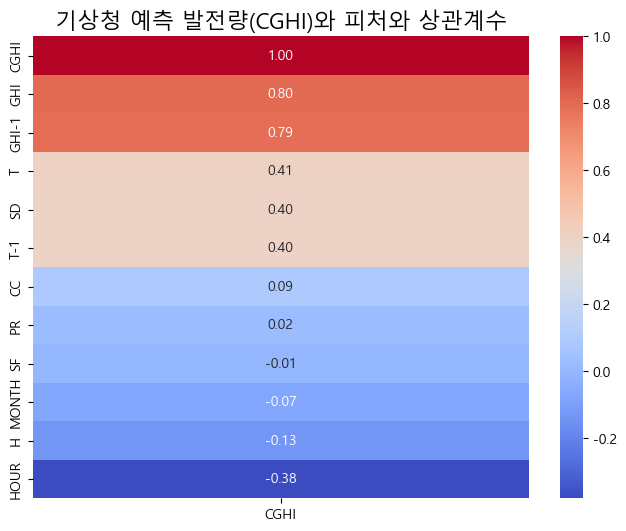

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계에 필요없는 열 제거한 df_satin_selection2
df_weather_statin_mergin2 = df_weather_statin_mergin  
columns_to_drop = ['name', 'YEAR', 'DAY']
df_weather_statin_mergin2 = df_weather_statin_mergin2.drop(columns_to_drop, axis=1)
correlation_matrix = df_weather_statin_mergin2.corr()    # df_satin_selection2는 상관관계 분석을 위해 name열을 삭제한 df이다.

# CGHI와 다른 열들 간의 상관관계 계산
correlation_matrix = df_weather_statin_mergin2.corr()

# CGHI와의 상관관계만 선택
cg_correlation = correlation_matrix[['CGHI']].sort_values(by='CGHI', ascending=False)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cg_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# 그래프 타이틀과 축 레이블 설정
plt.title('기상청 예측 발전량(CGHI)와 피처와 상관계수', fontsize=16)
plt.show()

<h2 style="font-weight:600; color:cyan;"> 
    CGHI(기상청 예측 발전량)과의 상관관계 순위 :
</h2>

<h3 style="font-weight:600; color:cyan;"> 
    &nbsp;&nbsp;&nbsp;&nbsp;
    1. GHI(일사량)
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    2. GHI-1(좀전 일사량)
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    3. T(기온)
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    4. T-1(좀전 기온)
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    5. HOUR(시)   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# 음의 상관계수
</h3>

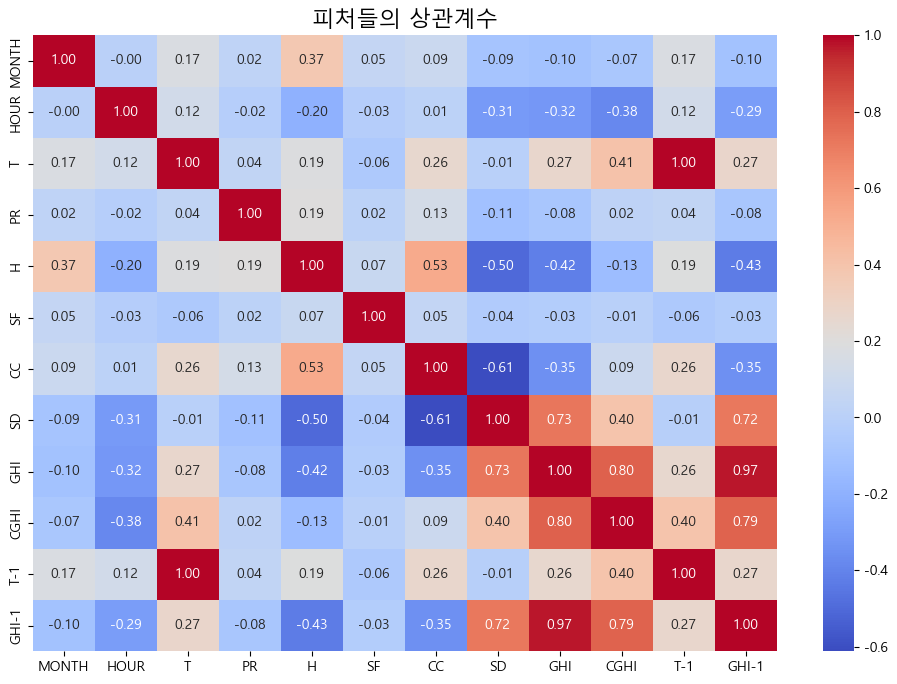

In [106]:
# 상관관계 계산
correlation_matrix = df_weather_statin_mergin2.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# 그래프 타이틀과 축 레이블 설정
plt.title('피처들의 상관계수', fontsize=16)
plt.show()

<h2 style="font-weight:600; color:cyan;"> 
    그외 유의미한 상관관계 순위 :
</h2>

<h3 style="font-weight:600; color:cyan;"> 
    &nbsp;&nbsp;&nbsp;&nbsp;
    1. CC(전운량) - SD(일조시간)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# 음의 상관계수
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    2. 습도(H) - SD(일조시간)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# 음의 상관계수
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    3. GHI(일사량) & GHI-1(좀전 일사량) - 습도(H)   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# 음의 상관계수
</h3>

In [136]:
which_station_to_analyze = "시청별관"    # 어떤 충전소를 선택해서 분석할 것인지?
station_name = which_station_to_analyze
# 선택된 충전소는 df_satin_selection에 들어간다.
df_satin_selection =  df_weather_statin_mergin[(df_weather_statin_mergin['name'] == which_station_to_analyze)]   

df_satin_selection.head(5)

,YEAR,MONTH,DAY,HOUR,T,PR,H,SF,CC,SD,name,GHI,CGHI,T-1,GHI-1
11,2022,1,2,9,0.136364,0.0,0.54,0.0,0.4,0.9,시청별관,0.000000,0.000000,0.080087,0.000000
22,2022,1,2,10,0.199134,0.0,0.44,0.0,0.1,1.0,시청별관,0.000000,0.000000,0.136364,0.000000
33,2022,1,2,11,0.261905,0.0,0.34,0.0,0.4,1.0,시청별관,0.359318,0.401765,0.199134,0.000000
44,2022,1,2,12,0.290043,0.0,0.33,0.0,0.7,0.6,시청별관,0.229942,0.480833,0.261905,0.311218
55,2022,1,2,13,0.333333,0.0,0.40,0.0,0.4,0.8,시청별관,0.310743,0.511394,0.290043,0.199899


<h2 style="font-weight:600; color:cyan;"> 
    원하는 충전소의 데이터를 df_satin_selection에 넣어서 충전소의 분석을 시작한다.
</h2>

<h3 style="font-weight:600; color:cyan;"> 
    &nbsp;&nbsp;&nbsp;&nbsp;
    1. 제주의 태양광 발전 데이터로 만든 모델을 불러와서 발전량을 예측한다.    
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
        1-1.기상청 예측 발전량을 믿을 수 있는지 모르기때문이다.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
        1-1.기상청 예측 발전량의 설치용량을 모르기때문에 활용하기 어렵다.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    2. 한 충전소의 월별, 시간별 발전량의 표를 만든다.
</h3>

In [137]:
import joblib

# 피처로 사용할 열을 선택하여 X_test를 만듭니다.
features = ['T', 'PR', 'H', 'SF', 'CC', 'SD', 'GHI','T-1','GHI-1']
X_test = df_satin_selection[features]

# 모델과 스케일러 불러오기
loaded_model = joblib.load('./data/대구 발전량 예측 관련 데이터/best_xgboost_model_with_SD.pkl')
loaded_scaler = joblib.load('./data/대구 발전량 예측 관련 데이터/scaler_with_SD.pkl')

# 예제 데이터에 대한 예측 수행 (X_test_scaled로 변환하여 사용)
X_new_scaled = loaded_scaler.transform(X_test)  # 새로운 데이터 스케일링
y_new_pred = loaded_model.predict(X_new_scaled)

# print(y_new_pred)
# 예측 결과를 TARGET이라는 새로운 열로 추가   1kW 설치용량에서의 예상 발전량 (단위는 Wh)
df_satin_selection['TARGET'] = y_new_pred

# 결과 확인
df_satin_selection.head()


C:\Users\tlgud\AppData\Local\Temp\ipykernel_5876\3177122049.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satin_selection['TARGET'] = y_new_pred


,YEAR,MONTH,DAY,HOUR,T,PR,H,SF,CC,SD,name,GHI,CGHI,T-1,GHI-1,TARGET
11,2022,1,2,9,0.136364,0.0,0.54,0.0,0.4,0.9,시청별관,0.000000,0.000000,0.080087,0.000000,15.791015
22,2022,1,2,10,0.199134,0.0,0.44,0.0,0.1,1.0,시청별관,0.000000,0.000000,0.136364,0.000000,15.183434
33,2022,1,2,11,0.261905,0.0,0.34,0.0,0.4,1.0,시청별관,0.359318,0.401765,0.199134,0.000000,573.370056
44,2022,1,2,12,0.290043,0.0,0.33,0.0,0.7,0.6,시청별관,0.229942,0.480833,0.261905,0.311218,134.733459
55,2022,1,2,13,0.333333,0.0,0.40,0.0,0.4,0.8,시청별관,0.310743,0.511394,0.290043,0.199899,474.652191


C:\Users\tlgud\AppData\Local\Temp\ipykernel_5876\2760980823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satin_selection['TARGET_kWh'] = df_satin_selection['TARGET'] / 1000
C:\Users\tlgud\AppData\Local\Temp\ipykernel_5876\2760980823.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_target_sum.index, y=monthly_target_sum.values, palette="Blues_d")


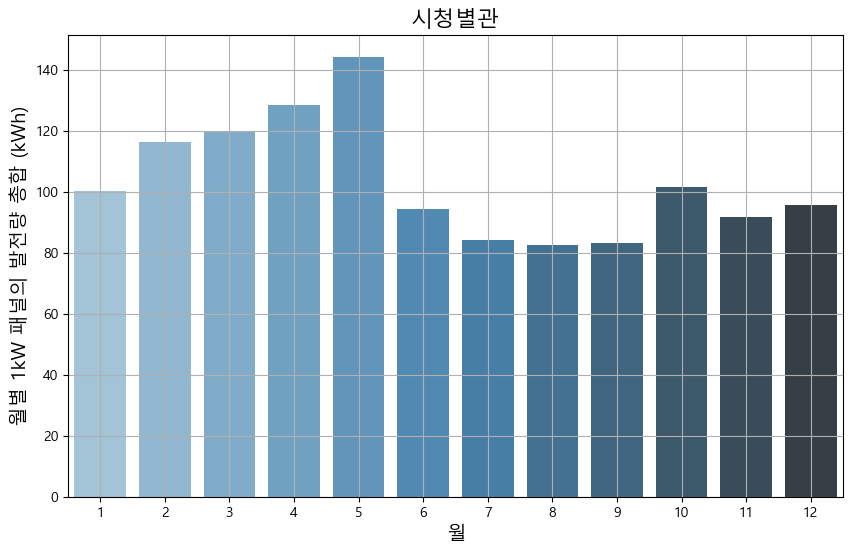

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TARGET을 kWh로 변환
df_satin_selection['TARGET_kWh'] = df_satin_selection['TARGET'] / 1000

# MONTH별 TARGET의 합계 계산 (kWh 단위로)
monthly_target_sum = df_satin_selection.groupby('MONTH')['TARGET_kWh'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_target_sum.index, y=monthly_target_sum.values, palette="Blues_d")

plt.title(f'{station_name}', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('월별 1kW 패널의 발전량 총합 (kWh)', fontsize=14)
plt.grid(True)

plt.show()


C:\Users\tlgud\AppData\Local\Temp\ipykernel_5876\1885933327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satin_selection['TARGET_kWh'] = df_satin_selection['TARGET'] / 1000
C:\Users\tlgud\AppData\Local\Temp\ipykernel_5876\1885933327.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_target_sum.index, y=hourly_target_sum.values, palette="Blues_d")


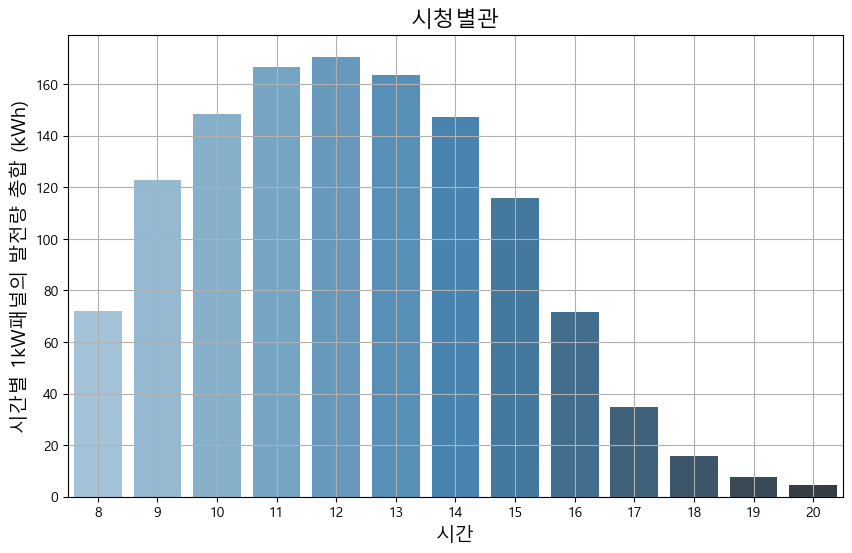

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (예시로 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# TARGET을 kWh로 변환
df_satin_selection['TARGET_kWh'] = df_satin_selection['TARGET'] / 1000

# HOUR별 TARGET의 합계 계산 (kWh 단위로)
hourly_target_sum = df_satin_selection.groupby('HOUR')['TARGET_kWh'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_target_sum.index, y=hourly_target_sum.values, palette="Blues_d")

plt.title(f'{station_name}', fontsize=16)
plt.xlabel('시간', fontsize=14)
plt.ylabel('시간별 1kW패널의 발전량 총합 (kWh)', fontsize=14)
plt.grid(True)

plt.show()


In [125]:
# #  기상청 예측 모델과 내모델을 비교하려고했는데 안 나오니 포기..!


# import matplotlib.pyplot as plt

# # 문자열 삭제
# columns_to_drop = ['name']
# df_satin_selection2 = df_satin_selection.drop(columns_to_drop, axis=1)

# # 2020년 1월 2일 데이터 필터링
# data_20200102 = df_satin_selection2[(df_satin_selection['YEAR'] == 2022) & (df_satin_selection['MONTH'] == 1) & (df_satin_selection['DAY'] == 2)]
# # 결측치 제거
# data_20200102.dropna(inplace=True)


# # 스케일링 및 예측 수행
# X_20200102 = data_20200102[['T', 'PR', 'H', 'SF', 'CC', 'SD', 'GHI', 'T-1', 'GHI-1']]
# X_20200102_scaled = scaler.transform(X_20200102)

# # 예측 수행
# y_20200102_pred = loaded_model.predict(X_20200102_scaled)

# # 그래프 그리기
# plt.figure(figsize=(15, 7))
# plt.plot(data_20200102.index, data_20200102['SGHI'], label='Actual')  # 기상청 예측값 그리기
# plt.plot(data_20200102.index, y_20200102_pred, label='Predicted')  # 내가 만든 모델 예측값 그리기
# plt.title('Actual vs Predicted Solar Power Output on 2022-01-01')
# plt.xlabel('Index')
# plt.ylabel('Power Output')
# plt.legend()
# plt.grid(True)
# plt.show()
